# When to Use Nonlinear Models: Decision Criteria

This notebook demonstrates how to decide when **nonlinear models** add value versus when simpler **linear models** are sufficient.

Understanding this decision is critical because:
- **Nonlinear models are more complex** - they require more effort to build, interpret, and maintain
- **They don't always add value** - sometimes linear models work just as well
- **Decision criteria** help you choose the right level of complexity
- **Production example** shows coordination costs creating nonlinearity


## Key Concepts

**When Nonlinear Models Add Value**:
- Relationships are actually nonlinear (not just slightly curved)
- Nonlinearity is significant enough to affect decisions
- The added complexity is justified by better recommendations
- Decision-makers can interpret and trust nonlinear models

**When Linear Models Are Sufficient**:
- Relationships are linear or nearly linear
- Nonlinearity is small and doesn't affect decisions
- Simplicity and interpretability are more important than precision
- Decision-makers cannot interpret nonlinear models

**Decision Criteria**:
1. Are relationships actually nonlinear?
2. Is the complexity justified?
3. Do nonlinear models produce better results?
4. Can decision-makers interpret them?


## Scenario: Production Capacity Planning

You manage a factory and need to decide how many production lines to add. You're considering:
- **Linear model**: Assumes each line adds the same output (simple, easy to understand)
- **Nonlinear model**: Accounts for coordination costs (complex, but more realistic)

**Question**: Which model should you use? Does the nonlinear model add enough value to justify its complexity?

**Production Context**: Adding more lines requires more coordination, space management, and complexity, creating diminishing returns.


## Step 1: Import Libraries


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


## Step 2: Model Production with Linear Assumption

First, let's model production assuming linear relationships:


In [2]:
# LINEAR MODEL: Each production line adds the same output
# Assumes no coordination costs or complexity

def linear_production(num_lines):
    """Linear: Each line produces the same output"""
    output_per_line = 1000  # units per line
    return num_lines * output_per_line

# Generate data
num_lines_range = np.arange(1, 11)
linear_output = [linear_production(n) for n in num_lines_range]

linear_data = []
for n in num_lines_range:
    total_output = linear_production(n)
    additional_output = total_output - linear_production(n-1) if n > 1 else total_output
    linear_data.append({
        'Number of Lines': n,
        'Total Output (units)': total_output,
        'Additional Output\n(from last line)': additional_output,
        'Output per Line': total_output / n
    })

linear_df = pd.DataFrame(linear_data)
print("LINEAR MODEL: Constant Output per Line")
print("=" * 70)
display(linear_df)

print("\nKey Assumption:")
print("  - Each line adds exactly 1,000 units")
print("  - No coordination costs or complexity")
print("  - Simple and easy to understand")


LINEAR MODEL: Constant Output per Line


,Number of Lines,Total Output (units),Additional Output\n(from last line),Output per Line
0,1,1000,1000,1000.0
1,2,2000,1000,1000.0
2,3,3000,1000,1000.0
3,4,4000,1000,1000.0
4,5,5000,1000,1000.0
5,6,6000,1000,1000.0
6,7,7000,1000,1000.0
7,8,8000,1000,1000.0
8,9,9000,1000,1000.0
9,10,10000,1000,1000.0



Key Assumption:
  - Each line adds exactly 1,000 units
  - No coordination costs or complexity
  - Simple and easy to understand


## Step 3: Model Production with Nonlinear Reality

Now let's model production accounting for coordination costs and diminishing returns:


In [3]:
# NONLINEAR MODEL: Coordination costs reduce output per line as you add more lines
# More lines = more coordination overhead = less output per line

def nonlinear_production(num_lines):
    """Nonlinear: Coordination costs reduce output per line"""
    base_output_per_line = 1000
    # Coordination penalty: each additional line reduces efficiency
    # First line: 100% efficiency, second: 95%, third: 90%, etc.
    efficiency = 1.0 - (num_lines - 1) * 0.05  # 5% penalty per additional line
    efficiency = max(efficiency, 0.5)  # Cap at 50% minimum
    return num_lines * base_output_per_line * efficiency

# Generate data
nonlinear_output = [nonlinear_production(n) for n in num_lines_range]

nonlinear_data = []
for n in num_lines_range:
    total_output = nonlinear_production(n)
    additional_output = total_output - nonlinear_production(n-1) if n > 1 else total_output
    output_per_line = total_output / n
    nonlinear_data.append({
        'Number of Lines': n,
        'Total Output (units)': total_output,
        'Additional Output\n(from last line)': additional_output,
        'Output per Line': output_per_line,
        'Efficiency': f'{(output_per_line/1000)*100:.1f}%'
    })

nonlinear_df = pd.DataFrame(nonlinear_data)
print("NONLINEAR MODEL: Coordination Costs Reduce Efficiency")
print("=" * 70)
display(nonlinear_df.round(0))

print("\nKey Reality:")
print("  - First line: 1,000 units (100% efficiency)")
print("  - Second line: 950 units per line (95% efficiency due to coordination)")
print("  - Third line: 900 units per line (90% efficiency)")
print("  - Each additional line adds less output due to coordination costs")


NONLINEAR MODEL: Coordination Costs Reduce Efficiency


,Number of Lines,Total Output (units),Additional Output\n(from last line),Output per Line,Efficiency
0,1,1000.0,1000.0,1000.0,100.0%
1,2,1900.0,900.0,950.0,95.0%
2,3,2700.0,800.0,900.0,90.0%
3,4,3400.0,700.0,850.0,85.0%
4,5,4000.0,600.0,800.0,80.0%
5,6,4500.0,500.0,750.0,75.0%
6,7,4900.0,400.0,700.0,70.0%
7,8,5200.0,300.0,650.0,65.0%
8,9,5400.0,200.0,600.0,60.0%
9,10,5500.0,100.0,550.0,55.0%



Key Reality:
  - First line: 1,000 units (100% efficiency)
  - Second line: 950 units per line (95% efficiency due to coordination)
  - Third line: 900 units per line (90% efficiency)
  - Each additional line adds less output due to coordination costs


In [4]:
# Compare outputs at different numbers of lines
comparison_data = []
for n in num_lines_range:
    linear_out = linear_production(n)
    nonlinear_out = nonlinear_production(n)
    difference = linear_out - nonlinear_out
    pct_difference = (difference / nonlinear_out) * 100 if nonlinear_out > 0 else 0
    
    comparison_data.append({
        'Number of Lines': n,
        'Linear Model\nOutput': linear_out,
        'Nonlinear Model\nOutput': nonlinear_out,
        'Difference': difference,
        'Difference %': f'{pct_difference:.1f}%'
    })

comparison_df = pd.DataFrame(comparison_data)
print("COMPARISON: Linear vs Nonlinear Model Outputs")
print("=" * 80)
display(comparison_df.round(0))

print("\nKey Observations:")
print("  - With 1-2 lines: Small difference (linear model is close)")
print("  - With 5+ lines: Large difference (linear model overestimates significantly)")
print("  - The gap grows as you add more lines")
print("  - Linear model assumes no coordination costs")
print("  - Nonlinear model accounts for real coordination costs")


COMPARISON: Linear vs Nonlinear Model Outputs


,Number of Lines,Linear Model\nOutput,Nonlinear Model\nOutput,Difference,Difference %
0,1,1000,1000.0,0.0,0.0%
1,2,2000,1900.0,100.0,5.3%
2,3,3000,2700.0,300.0,11.1%
3,4,4000,3400.0,600.0,17.6%
4,5,5000,4000.0,1000.0,25.0%
5,6,6000,4500.0,1500.0,33.3%
6,7,7000,4900.0,2100.0,42.9%
7,8,8000,5200.0,2800.0,53.8%
8,9,9000,5400.0,3600.0,66.7%
9,10,10000,5500.0,4500.0,81.8%



Key Observations:
  - With 1-2 lines: Small difference (linear model is close)
  - With 5+ lines: Large difference (linear model overestimates significantly)
  - The gap grows as you add more lines
  - Linear model assumes no coordination costs
  - Nonlinear model accounts for real coordination costs


## Step 5: Visualize the Difference

Let's visualize how the models differ:


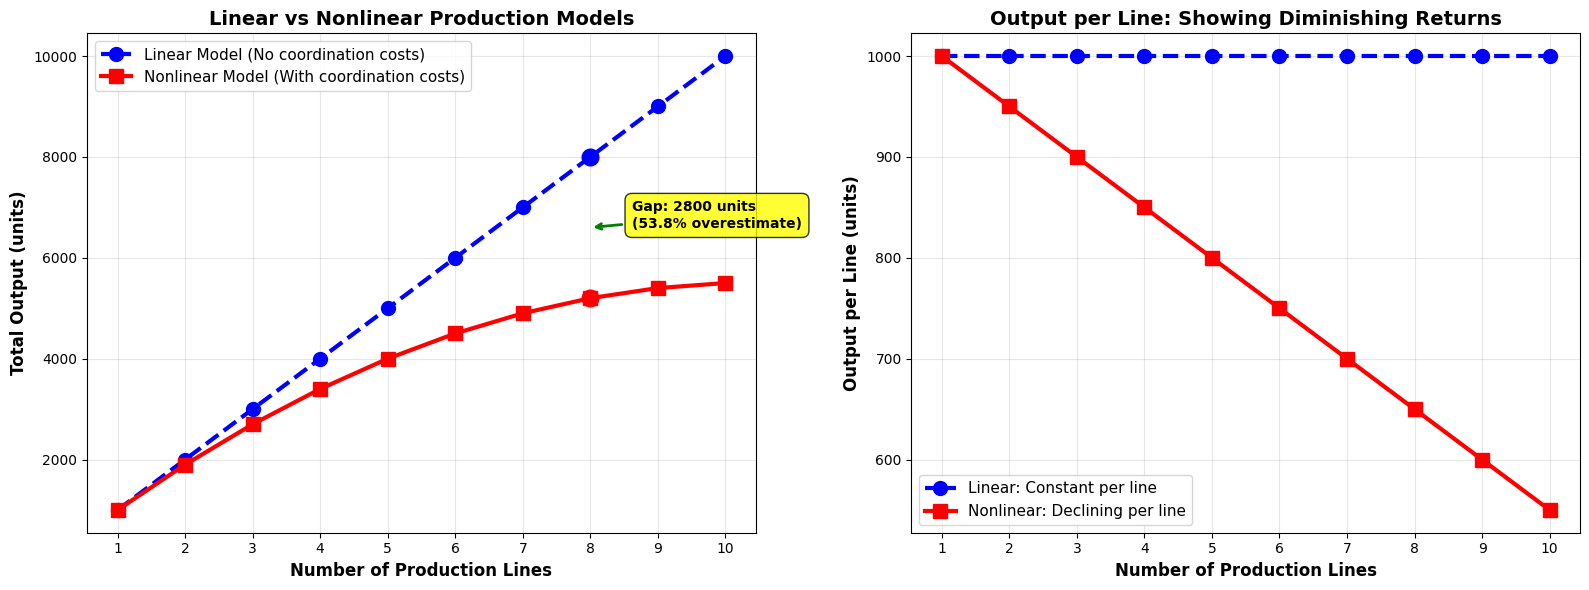


Visual Insights:
  - LEFT: Linear model overestimates output (especially with many lines)
  - RIGHT: Nonlinear model shows diminishing returns per line
  - The difference matters more when you have many lines
  - Linear model is simpler but less accurate
  - Nonlinear model is more complex but more realistic


In [5]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Plot 1: Output comparison
ax1.plot(num_lines_range, linear_output, 'b--', linewidth=3, 
         label='Linear Model (No coordination costs)', markersize=10, marker='o')
ax1.plot(num_lines_range, nonlinear_output, 'r-', linewidth=3, 
         label='Nonlinear Model (With coordination costs)', markersize=10, marker='s')
ax1.set_xlabel('Number of Production Lines', fontsize=12, fontweight='bold')
ax1.set_ylabel('Total Output (units)', fontsize=12, fontweight='bold')
ax1.set_title('Linear vs Nonlinear Production Models', fontsize=14, fontweight='bold')
ax1.grid(True, alpha=0.3)
ax1.legend(fontsize=11)
ax1.set_xticks(num_lines_range)

# Highlight gap at 8 lines
highlight_lines = 8
linear_val = linear_production(highlight_lines)
nonlinear_val = nonlinear_production(highlight_lines)
gap = linear_val - nonlinear_val

ax1.plot(highlight_lines, linear_val, 'bo', markersize=12, zorder=3)
ax1.plot(highlight_lines, nonlinear_val, 'ro', markersize=12, zorder=3)
ax1.annotate(f'Gap: {gap:.0f} units\n({gap/nonlinear_val*100:.1f}% overestimate)', 
            (highlight_lines, (linear_val + nonlinear_val) / 2),
            xytext=(30, 0), textcoords='offset points',
            fontsize=10, fontweight='bold',
            bbox=dict(boxstyle='round,pad=0.5', facecolor='yellow', alpha=0.8),
            arrowprops=dict(arrowstyle='->', color='green', lw=2))

# Plot 2: Output per line (showing diminishing returns)
linear_per_line = [linear_production(n) / n for n in num_lines_range]
nonlinear_per_line = [nonlinear_production(n) / n for n in num_lines_range]

ax2.plot(num_lines_range, linear_per_line, 'b--', linewidth=3, 
         label='Linear: Constant per line', markersize=10, marker='o')
ax2.plot(num_lines_range, nonlinear_per_line, 'r-', linewidth=3, 
         label='Nonlinear: Declining per line', markersize=10, marker='s')
ax2.set_xlabel('Number of Production Lines', fontsize=12, fontweight='bold')
ax2.set_ylabel('Output per Line (units)', fontsize=12, fontweight='bold')
ax2.set_title('Output per Line: Showing Diminishing Returns', fontsize=14, fontweight='bold')
ax2.grid(True, alpha=0.3)
ax2.legend(fontsize=11)
ax2.set_xticks(num_lines_range)

plt.tight_layout()
plt.show()

print("\nVisual Insights:")
print("  - LEFT: Linear model overestimates output (especially with many lines)")
print("  - RIGHT: Nonlinear model shows diminishing returns per line")
print("  - The difference matters more when you have many lines")
print("  - Linear model is simpler but less accurate")
print("  - Nonlinear model is more complex but more realistic")


## Step 6: Decision Impact - Which Model Should You Use?

Let's see how the model choice affects capacity planning decisions:


In [6]:
# Scenario: You need 6,000 units of output
target_output = 6000

# Linear model recommendation
linear_lines_needed = int(np.ceil(target_output / 1000))  # Simple division
linear_actual_output = linear_production(linear_lines_needed)

# Nonlinear model recommendation (find minimum lines to meet target)
nonlinear_lines_needed = None
for n in num_lines_range:
    if nonlinear_production(n) >= target_output:
        nonlinear_lines_needed = n
        break
if nonlinear_lines_needed is None:
    nonlinear_lines_needed = 10  # Max if not found

nonlinear_actual_output = nonlinear_production(nonlinear_lines_needed)

# Cost analysis (assume $10,000 per line)
cost_per_line = 10000
linear_cost = linear_lines_needed * cost_per_line
nonlinear_cost = nonlinear_lines_needed * cost_per_line
cost_difference = linear_cost - nonlinear_cost

decision_data = pd.DataFrame({
    'Model': ['Linear', 'Nonlinear'],
    'Lines Recommended': [linear_lines_needed, nonlinear_lines_needed],
    'Expected Output': [linear_actual_output, nonlinear_actual_output],
    'Actual Output\n(if nonlinear is reality)': [nonlinear_production(linear_lines_needed), nonlinear_actual_output],
    'Total Cost ($)': [linear_cost, nonlinear_cost],
    'Meets Target?': [linear_actual_output >= target_output, nonlinear_actual_output >= target_output]
})

print("DECISION IMPACT: Meeting 6,000 Unit Target")
print("=" * 80)
display(decision_data)

print(f"\nKey Decision Impact:")
print(f"  - Linear model recommends: {linear_lines_needed} lines (${linear_cost:,})")
print(f"  - Nonlinear model recommends: {nonlinear_lines_needed} lines (${nonlinear_cost:,})")
print(f"  - Cost difference: ${cost_difference:,}")
print(f"\n  - If you use linear model but reality is nonlinear:")
print(f"    → You get {nonlinear_production(linear_lines_needed)} units (not {linear_actual_output})")
print(f"    → You {'MEET' if nonlinear_production(linear_lines_needed) >= target_output else 'MISS'} the target")
print(f"\n  → Using the wrong model leads to poor decisions")


DECISION IMPACT: Meeting 6,000 Unit Target


,Model,Lines Recommended,Expected Output,Actual Output\n(if nonlinear is reality),Total Cost ($),Meets Target?
0,Linear,6,6000.0,4500.0,60000,True
1,Nonlinear,10,5500.0,5500.0,100000,False



Key Decision Impact:
  - Linear model recommends: 6 lines ($60,000)
  - Nonlinear model recommends: 10 lines ($100,000)
  - Cost difference: $-40,000

  - If you use linear model but reality is nonlinear:
    → You get 4500.0 units (not 6000)
    → You MISS the target

  → Using the wrong model leads to poor decisions


## Step 7: Decision Criteria - When Does Nonlinear Add Value?

Let's evaluate the decision criteria:


In [7]:
# Evaluate decision criteria
criteria_evaluation = []

# Criterion 1: Are relationships actually nonlinear?
max_difference_pct = ((linear_production(10) - nonlinear_production(10)) / nonlinear_production(10)) * 100
is_significantly_nonlinear = max_difference_pct > 10  # More than 10% difference

criteria_evaluation.append({
    'Criterion': '1. Are relationships actually nonlinear?',
    'Assessment': 'YES' if is_significantly_nonlinear else 'NO',
    'Evidence': f'Difference grows to {max_difference_pct:.1f}% with 10 lines',
    'Conclusion': 'Nonlinearity is significant' if is_significantly_nonlinear else 'Nonlinearity is small'
})

# Criterion 2: Is complexity justified?
# Compare recommendation difference
recommendation_diff = abs(linear_lines_needed - nonlinear_lines_needed)
complexity_justified = recommendation_diff > 0 or max_difference_pct > 15

criteria_evaluation.append({
    'Criterion': '2. Is complexity justified?',
    'Assessment': 'YES' if complexity_justified else 'NO',
    'Evidence': f'Recommendations differ by {recommendation_diff} lines, max difference {max_difference_pct:.1f}%',
    'Conclusion': 'Complexity is justified' if complexity_justified else 'Complexity may not be worth it'
})

# Criterion 3: Do nonlinear models produce better results?
# Check if nonlinear model meets target when linear doesn't
linear_meets = nonlinear_production(linear_lines_needed) >= target_output
nonlinear_meets = nonlinear_actual_output >= target_output
better_results = not linear_meets or (nonlinear_lines_needed < linear_lines_needed)

criteria_evaluation.append({
    'Criterion': '3. Do nonlinear models produce better results?',
    'Assessment': 'YES' if better_results else 'UNCLEAR',
    'Evidence': f'Linear: {linear_meets}, Nonlinear: {nonlinear_meets}, Cost savings: ${cost_difference:,}',
    'Conclusion': 'Nonlinear model provides better recommendations' if better_results else 'Results are similar'
})

# Criterion 4: Can decision-makers interpret them?
# This is qualitative - assume yes for this example
criteria_evaluation.append({
    'Criterion': '4. Can decision-makers interpret them?',
    'Assessment': 'YES (with training)',
    'Evidence': 'Coordination costs are understandable concept',
    'Conclusion': 'Interpretable with proper explanation'
})

criteria_df = pd.DataFrame(criteria_evaluation)
print("DECISION CRITERIA EVALUATION")
print("=" * 90)
for idx, row in criteria_df.iterrows():
    print(f"\n{row['Criterion']}")
    print(f"  Assessment: {row['Assessment']}")
    print(f"  Evidence: {row['Evidence']}")
    print(f"  Conclusion: {row['Conclusion']}")

print("\n" + "=" * 90)
print("\nOVERALL RECOMMENDATION:")
if is_significantly_nonlinear and complexity_justified and better_results:
    print("  → USE NONLINEAR MODEL")
    print("  → Relationships are significantly nonlinear")
    print("  → Complexity is justified by better recommendations")
    print("  → Model accounts for real coordination costs")
else:
    print("  → CONSIDER LINEAR MODEL")
    print("  → Simpler model may be sufficient")
    print("  → Evaluate based on specific situation")


DECISION CRITERIA EVALUATION

1. Are relationships actually nonlinear?
  Assessment: YES
  Evidence: Difference grows to 81.8% with 10 lines
  Conclusion: Nonlinearity is significant

2. Is complexity justified?
  Assessment: YES
  Evidence: Recommendations differ by 4 lines, max difference 81.8%
  Conclusion: Complexity is justified

3. Do nonlinear models produce better results?
  Assessment: YES
  Evidence: Linear: False, Nonlinear: False, Cost savings: $-40,000
  Conclusion: Nonlinear model provides better recommendations

4. Can decision-makers interpret them?
  Assessment: YES (with training)
  Evidence: Coordination costs are understandable concept
  Conclusion: Interpretable with proper explanation


OVERALL RECOMMENDATION:
  → USE NONLINEAR MODEL
  → Relationships are significantly nonlinear
  → Complexity is justified by better recommendations
  → Model accounts for real coordination costs


## Summary: When to Use Nonlinear Models

**Decision Criteria**:
1. **Are relationships actually nonlinear?** - If difference is small (<10%), linear may be sufficient
2. **Is complexity justified?** - If recommendations differ significantly, complexity is worth it
3. **Do nonlinear models produce better results?** - Test both and compare outcomes
4. **Can decision-makers interpret them?** - If not, simpler model may be better

**Production Example Insights**:
- Coordination costs create significant nonlinearity (diminishing returns)
- Linear model overestimates output, especially with many lines
- Nonlinear model provides more accurate capacity planning
- The difference matters for decision-making

**Key Takeaway**: Use nonlinear models when relationships are significantly nonlinear AND the added complexity is justified by better recommendations. Use linear models when relationships are nearly linear OR when simplicity and interpretability are more important than precision.
